# Lab 3: Project Jump Start (Worksheet)

**Learning Objectives:**

- Using `try` and `except` to create a safe type-casting module. (Code)
- Reading/writing data files using `pandas`. (Code)
- Manipulating data using lists and dictionaries. (Code)
- Develop a complex algorithm by breaking the task down into simple steps. (Code)

In this lab, we will compute one of the metrics discussed in last class, which is for each term, room and day of week, what is the proportion of "prime time" (from say 10 to 16) that is utilized. 

# Module 1: Applying String Splitting and Casting 

Recall the functions for converting a string into an integer and for splitting strings from last time
```python
'hello world'.split(' ')
int('54')
```

When we type 
```python
int('fasdf')
```
There will be an error and the code crashes. To prevent the crash, we use the `try` and `except` construct:

```python
inputData='fasdf'

try:
    output=int(inputData)
except:
    output='Not a number'
print(output)
```
Type out the above code yourself and see.

**Exercise 1:**
Write a function `convert(inputNum)` that converts a given inputNum into an int, and return `np.nan` (not a number) if there's an error.

**Solution:**

In [1]:
import numpy as np
def convert(inputNum):
    # Insert your code here inside the function.

    try:
        output=int(inputNum)
    except:
        output=np.nan
    return output
    #print(output)
    
print(convert('3'))      # should return 3
print(convert('fadsf'))  # should return np.nan
print(convert('1.5'))    # should also return np.nan, because 1.5 is fractional and not an integer 



3
nan
nan


## Challenge 1
**Part a:** Correctly convert the following input into the number of hours since midnight and set it to the variable output. Then replace inputTime with `inputTime='3f'` and see if you get `nan` as output. Suppose data is `hh:mm:ss`, $time=hh+mm/60+ss/3600$.

**Solution:**

In [3]:
inputTime='14:25:33'
# Complete your code here
try:
    hh,mm,ss=inputTime.split(':')
    ans=int(hh)+int(mm)/60+int(ss)/3600
except:
    ans=np.nan

ans

14.425833333333333

**Part b:** Write your working code from above into a function called `convert`, which takes an input string and convert it to a `float` representing hours since midnight if possible, otherwise returns `np.nan`.

**Solution:**

In [6]:
import numpy as np

def convert(inputTime):
    # Complete your code here
    try:
        hh,mm,ss=inputTime.split(':')
        ans=int(hh)+int(mm)/60+int(ss)/3600
    except:
        ans=np.nan
    return ans

# Testing
print(convert('20:30:00'))
print(convert('TBA'))
print(convert(np.nan))

20.5
nan
nan


# Demonstration of Loading Data with Pandas (More Next Class)

To run the following code, you must either copy the three excel files below (from the Final Project zip file) into the same folder as the present Jupyter notebook, or change the directory below to point to the file. 

In [41]:
import pandas as pd
schedule=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')
cancelled=pd.read_excel('Cancelled_Courses_1516_1617.xlsx')
master=schedule.append(cancelled)
capacities=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx')

master.info()
master.to_csv('Merged_Enrollment.csv')
pd.set_option("display.max_columns",100)   # Display all columns so you can see the DataFrame better.
master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 3231
Data columns (total 26 columns):
Course                   3363 non-null object
Course Prefix            6131 non-null object
Course Suffix            6131 non-null object
Department               3363 non-null object
First Begin Time         5629 non-null object
First Days               5553 non-null object
First End Time           5629 non-null object
First Instructor         5664 non-null object
First Instructor UID     5645 non-null float64
First Room               5696 non-null object
Link                     936 non-null object
Max Units                6131 non-null float64
Min Units                6131 non-null float64
Mode                     6131 non-null object
Reg Count                6131 non-null int64
Seats                    6131 non-null int64
Second Begin Time        43 non-null object
Second Days              43 non-null object
Second End Time          43 non-null object
Second Instructor        

,Course,Course Prefix,Course Suffix,Department,First Begin Time,First Days,First End Time,First Instructor,First Instructor UID,First Room,Link,Max Units,Min Units,Mode,Reg Count,Seats,Second Begin Time,Second Days,Second End Time,Second Instructor,Second Instructor UID,Second Room,Section,Session,Term,Title
0,ACCT-370,ACCT,370,ACCT,10:00:00,F,11:50:00,"Hopkins, Merle, W",3.783354e+09,SLH200,NaN,0.0,0.0,L,106,135,NaN,NaN,NaN,NaN,NaN,NaN,14029,1,20153,External Financial Reporting Issues
1,ACCT-370,ACCT,370,ACCT,08:00:00,MW,09:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,A,4.0,4.0,C,24,42,NaN,NaN,NaN,NaN,NaN,NaN,14025,1,20153,External Financial Reporting Issues
2,ACCT-370,ACCT,370,ACCT,10:00:00,MW,11:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,NaN,4.0,4.0,C,40,42,NaN,NaN,NaN,NaN,NaN,NaN,14026,1,20153,External Financial Reporting Issues
3,ACCT-370,ACCT,370,ACCT,12:00:00,MW,13:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,A,4.0,4.0,C,42,42,NaN,NaN,NaN,NaN,NaN,NaN,14027,1,20153,External Financial Reporting Issues
4,ACCT-371,ACCT,371,ACCT,10:00:00,F,11:50:00,NaN,NaN,SLH200,NaN,0.0,0.0,D,110,150,NaN,NaN,NaN,NaN,NaN,NaN,14044,1,20153,Introduction to Accounting Systems


## Module 2: Using Dictionaries and Sets

This module gives us practice on using fundamental Python data structures called dictionaries and sets. The challenge code allows us to separate out for each term, classroom, and day the set of time slots that the room is used. 

Recall that a list produces a mapping from a position index to a value. We can retrive the value by position, and append to the list as below.
```python
l=[1,3,5]
l[1]
l.append(6)
```

A dictionary is a mapping that allows for more complex indices. We can add to it by simply using indexing. 
```python
d={'apple':3,5:'five','orange':9}
d['apple']
d['Jack']='a friend'
```

We can test if something is in a dictionary as with a list
```python
'apple' in d
'apple' not in d
```

**Exercse 2:**
Define a dictionary mapping between `[1,3,5]` and 2 times of the numbers. Print the dictionary. Print whether 5 and '5' are in the dictionary. Then replace the value for 5 with 'Ten' and set the value for 'Six' to be 'Twelve'. Print the dictionary again.

**Solution:**

In [9]:
d={1:2,3:4,5:10}
print(d)
print(5 in d)
print(6 in d)
d[5]='Ten'
d['Six']='Twelve'
print(d)

{1: 2, 3: 4, 5: 10}
True
False
{1: 2, 3: 4, 5: 'Ten', 'Six': 'Twelve'}


We can iterate through a dictionary as follows
```python
for key in d:
    print('Key={0} Value={1}'.format(key,d[key]))
```

**Exercise 3**:
Create a new dictionary and give it arbitrary mappings, then use the above code to print how line by line the key to value correspondence of a new dictionary that you create.

**Solution**:

In [12]:
d={'a':'A','b':'B','d':'D'}
for key in d:
    print('Key={0} Value={1}'.format(key,d[key]))

Key=a Value=A
Key=b Value=B
Key=d Value=D


Just as with list comprehension, we can create a dictionary as follows.
```python
{i:i*i for i in [3,4,5]}
```

This is equivalent to the for loop:
```python
d={}
for i in range(6):
    d[i]=i*i
```

**Exercise 4**:
Create a dictionary that maps every number in range(6) to a string value: `{0:'0',1:'1',...}`. Do this two ways, first using a for loop and additing to an empty dictionary `{}`. Second, use the notation above.

**Solution**:

In [16]:
# First way
d={}
for i in range(5):
    d[i]=str(i)
print(d)

# Second way
d={i:str(i) for i in range(5)}
print(d)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}


## Sets

Sets is another construct like list, except that every element can only occur once in the set. 
```
s={3,5,6}
print(s)
s=set([3,3,4,5])
print(s)
```
Try typing the above and execute.

You can check for set membership or iterate through a set as with dictionaries. The benefit of sets over lists is that checking for membership is much faster, and elements are guaranteed to be unique.

```python
3 in s
3 not in s
for element in s:
    print(element)
len(s)
s.add('three')
```

**Exercise:**
Given the list `['a','b','a','a','c']`, obtain the number of unique elements by changing it into a set and querying for the length. Then check whether `'d'` is in the set. Finally, add 'd' to the set and check again.

**Solution:**

In [18]:
l=['a','b','a','a','c']
s=set(l)
print(s)
print('Number of unique elements is', len(s))
print('c' in s)
print('d' in s)


{'b', 'c', 'a'}
Number of unique elements is 3
True
False



## Challenge 2:
Load the data from the master file and put it into a dictionary with keys (term,room,day), filtering only for the rooms that are in the capacity file, as well as the rows with valid first begin times. The value of each entry should be a tuple of the earliest begin time found and the latest end time found.

**Solution:**
(See explanation of each line in the comments.)

In [33]:
#Importing packages
import pandas as pd
import numpy as np

#Reading excel files
master=pd.read_csv('Merged_Enrollment.csv')
capacities=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx')

roomSet=set(capacities.Room)      # Create a set which contains the rooms in the capacities file.
ans={}                   # Initialize a dictionary to store the result we want

df=master 
master.head()           # Print the first few lines of the DataFrame master, which we loaded above. See index on the left, and each row


,Unnamed: 0,Course,Course Prefix,Course Suffix,Department,First Begin Time,First Days,First End Time,First Instructor,First Instructor UID,First Room,Link,Max Units,Min Units,Mode,Reg Count,Seats,Second Begin Time,Second Days,Second End Time,Second Instructor,Second Instructor UID,Second Room,Section,Session,Term,Title
0,0,ACCT-370,ACCT,370,ACCT,10:00:00,F,11:50:00,"Hopkins, Merle, W",3.783354e+09,SLH200,NaN,0.0,0.0,L,106,135,NaN,NaN,NaN,NaN,NaN,NaN,14029,1,20153,External Financial Reporting Issues
1,1,ACCT-370,ACCT,370,ACCT,08:00:00,MW,09:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,A,4.0,4.0,C,24,42,NaN,NaN,NaN,NaN,NaN,NaN,14025,1,20153,External Financial Reporting Issues
2,2,ACCT-370,ACCT,370,ACCT,10:00:00,MW,11:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,NaN,4.0,4.0,C,40,42,NaN,NaN,NaN,NaN,NaN,NaN,14026,1,20153,External Financial Reporting Issues
3,3,ACCT-370,ACCT,370,ACCT,12:00:00,MW,13:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,A,4.0,4.0,C,42,42,NaN,NaN,NaN,NaN,NaN,NaN,14027,1,20153,External Financial Reporting Issues
4,4,ACCT-371,ACCT,371,ACCT,10:00:00,F,11:50:00,NaN,NaN,SLH200,NaN,0.0,0.0,D,110,150,NaN,NaN,NaN,NaN,NaN,NaN,14044,1,20153,Introduction to Accounting Systems


In [35]:
# Iterate through the rows of the data frame above. The variable "row" will go through the rows of the dataframe. "index" will go through the indices (see left above)
for index,row in df.iterrows():   
    term=row['Term']       # Obtain the corresponding column of each row
    room=row['First Room']
    days=row['First Days'] 
    beg=convert(row['First Begin Time'])   # Convert the begin time strings into decimal numbers using challenge 1
    end=convert(row['First End Time'])     # Convert the begin time strings into decimal numbers using challenge 1
    # Skip rows in which beg and end are np.nan (not a number), and in which the room is not in the capacity file
    if np.isnan(beg) or np.isnan(end) or room not in roomSet:  
        continue     # Command to skip this iteration of the loop
    for day in 'MTWHF':   # Iterate through the sequence ['M','T','W','H','F']
        if day in days: 
            key=(term,room,day)  # The key of the dictionary to set
            if key not in ans:   # if this key is not in the dictionary, add it, with the beg and end time of the current row
                ans[key]=(beg,end)   
            else:
                oldBeg,oldEnd=ans[key]  # If the key is in the dictionary, update it to find the earliest beg time so far and latest end time
                newBeg=min(beg,oldBeg)
                newEnd=max(end,oldEnd)
                ans[key]=(newBeg,newEnd)
ans

{(20153, 'ACC201', 'F'): (11.0, 14.333333333333334),
 (20153, 'ACC201', 'H'): (10.0, 19.833333333333332),
 (20153, 'ACC201', 'M'): (8.0, 19.833333333333332),
 (20153, 'ACC201', 'T'): (10.0, 19.833333333333332),
 (20153, 'ACC201', 'W'): (8.0, 19.833333333333332),
 (20153, 'ACC205', 'F'): (11.5, 14.833333333333334),
 (20153, 'ACC205', 'H'): (10.0, 20.333333333333332),
 (20153, 'ACC205', 'M'): (10.0, 21.5),
 (20153, 'ACC205', 'T'): (10.0, 20.333333333333332),
 (20153, 'ACC205', 'W'): (10.0, 20.833333333333332),
 (20153, 'ACC236', 'H'): (8.0, 21.5),
 (20153, 'ACC236', 'M'): (10.0, 21.5),
 (20153, 'ACC236', 'T'): (8.0, 21.5),
 (20153, 'ACC236', 'W'): (10.0, 21.5),
 (20153, 'ACC303', 'F'): (8.5, 15.833333333333334),
 (20153, 'ACC303', 'H'): (8.0, 21.833333333333332),
 (20153, 'ACC303', 'M'): (8.0, 19.833333333333332),
 (20153, 'ACC303', 'T'): (8.0, 21.5),
 (20153, 'ACC303', 'W'): (8.0, 19.833333333333332),
 (20153, 'ACC310', 'H'): (8.0, 17.833333333333332),
 (20153, 'ACC310', 'M'): (8.0, 21.

# Code Demonstration: Dumping Data Back into a DataFrame

In [19]:
lines=[]
for term,room,day in ans:
    beg,end=ans[term,room,day]
    lines.append([term,room,day,beg,end])
output=pd.DataFrame(lines,columns=['Term','Room','Day','Earliest','Latest'])

output.to_csv('Room_Simple_Usage.csv')
output.info()
output.describe()
output.head(10)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 5 columns):
Term        687 non-null int64
Room        687 non-null object
Day         687 non-null object
Earliest    687 non-null float64
Latest      687 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 26.9+ KB


,Term,Room,Day,Earliest,Latest
0,20153,ACC303,M,8.0,19.833333
1,20153,ACC303,W,8.0,19.833333
2,20153,ACC303,T,8.0,21.500000
3,20153,ACC303,H,8.0,21.833333
4,20153,HOH EDI,F,10.0,15.833333
5,20153,ACC310,T,8.0,17.833333
6,20153,ACC310,H,8.0,17.833333
7,20153,ACC310,M,8.0,21.500000
8,20153,ACC310,W,8.0,17.833333
9,20153,ACC205,M,10.0,21.500000


# Module 3: Developing an Algorithm to Compute a Non-Trivial Metric

## Exercse 3: 
Complete the following code to compute the total usage within prime time

In [24]:
primeStart=10
primeEnd=16
sortedList=[(8,10),(10.5,11.5),(11,12),(14,17),(18,20)]
usage=0
prev=0
for start,end in sortedList:
    if end<primeStart:
        continue
    if start>primeEnd:
        break
    start=max(prev,start)
    end=max(prev,end)
    overlap=max(0,min(primeEnd,end)-max(primeStart,start))
    usage+=overlap
    prev=end
print('Total usage within prime time',usage)
print('Proportion of prime time used',usage/(primeEnd-primeStart))

Total usage within prime time 3.5
Proportion of prime time used 0.5833333333333334


# Putting it all together

Create code that outputs a file for each term, room, and day the percentage of prime time used.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def convert(inputTime):
    # Code copy pasted from challenge 1, except first convert input to string before splitting
    try:
        hh,mm,ss=str(inputTime).split(':')
        ans=int(hh)+int(mm)/60+int(ss)/3600
    except:
        ans=np.nan
    return ans


def loadDataDict(df,roomSet):
    # Code copy pasted from challenge 2, except adding entries to a list instead of finding beginning and end, and adding empty list for unused classrooms
    ans={}
    # Start with empty lists in all classrooms
    terms=[20153,20161,20162,20163,20171,20172]
    for term in terms:
        for room in roomSet:
            for day in 'MTWHF':
                ans[term,room,day]=[]
    for index,row in df.iterrows():   
        term=row['Term']       # Obtain the corresponding column of each row
        room=row['First Room']
        days=row['First Days'] 
        beg=convert(row['First Begin Time'])   # Convert the begin time strings into decimal numbers using challenge 1
        end=convert(row['First End Time'])     # Convert the begin time strings into decimal numbers using challenge 1
        # Skip rows in which beg and end are np.nan (not a number), and in which the room is not in the capacity file
        #import pdb; pdb.set_trace()
        if np.isnan(beg) or np.isnan(end) or room not in roomSet:  
            continue     # Command to skip this iteration of the loop
        for day in 'MTWHF':   # Iterate through the sequence ['M','T','W','H','F']
            if day in days: 
                ans[term,room,day].append([beg,end])
    
    return ans
                    
def computeUsage(inputList, primeStart,primeEnd):
    # Code copy pasted from challenge 3, except sorting the inputList
    sortedList=sorted(inputList)
    usage=0
    prev=0
    for start,end in sortedList:
        if end<primeStart:
            continue
        if start>primeEnd:
            break
        start=max(prev,start)
        end=max(prev,end)
        overlap=max(0,min(primeEnd,end)-max(primeStart,start))
        usage+=overlap
        prev=end
    return usage/(primeEnd-primeStart)

# Beginning of main code.
primeStart=10
primeEnd=16

# Read in data
schedule=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')
cancelled=pd.read_excel('Cancelled_Courses_1516_1617.xlsx')
master=schedule.append(cancelled)
capacities=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx')

# Set rooms to focus on to be those in the capacity file.
roomSet=set(capacities.Room)

# Load the data from the master DataFrame into a dictionary of the format in challenge 2
dataDict=loadDataDict(master,roomSet)

# Create a list of lists, corresponding to the data we want to dump out. 
lines=[]
for term,room,day in loadDataDict(master,roomSet):
    # Each row of the output data has columns being term, room, day, utilization
    lines.append([term,room,day,computeUsage(dataDict[term,room,day],primeStart,primeEnd)])

# Store data back into a dataframe
output=pd.DataFrame(lines,columns=['Term','Room','Day','Utilization'])

# Output to a file
output.to_csv('RoomUsage.csv')
output.head()

,Term,Room,Day,Utilization
0,20153,HOH2,M,0.916667
1,20153,HOH2,T,0.916667
2,20153,HOH2,W,0.916667
3,20153,HOH2,H,0.916667
4,20153,HOH2,F,0.555556


## Extra: Visualizing the Prime Time Utilization

The following code uses data manipulation and plotting commands within the `pandas` package to visualize the data. It is provided for your references.

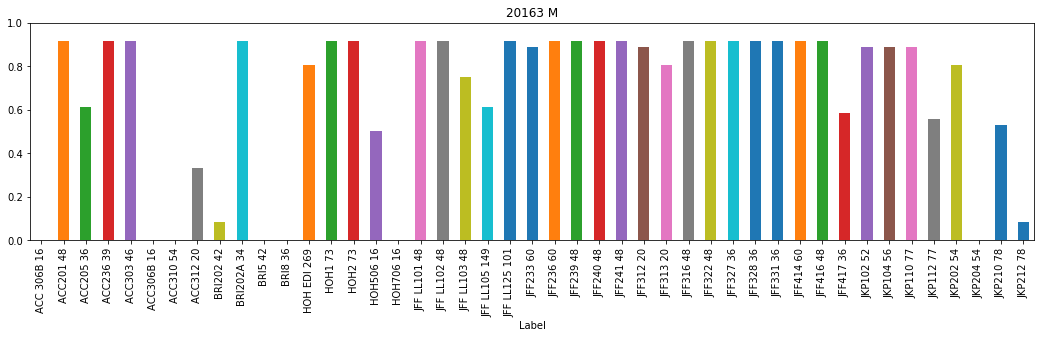

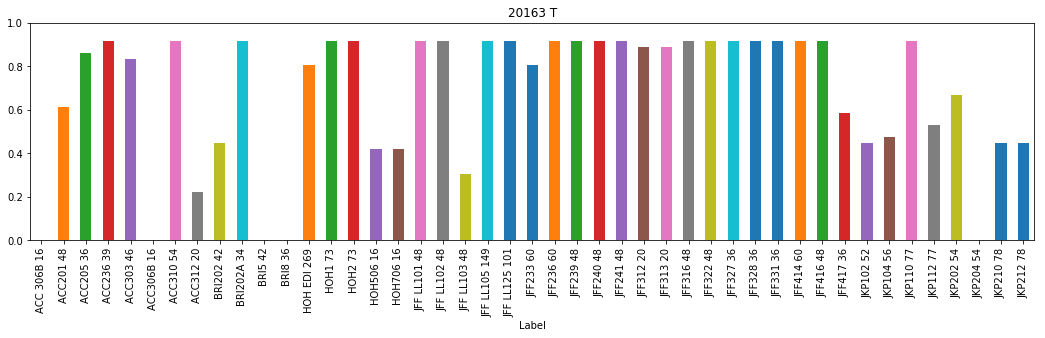

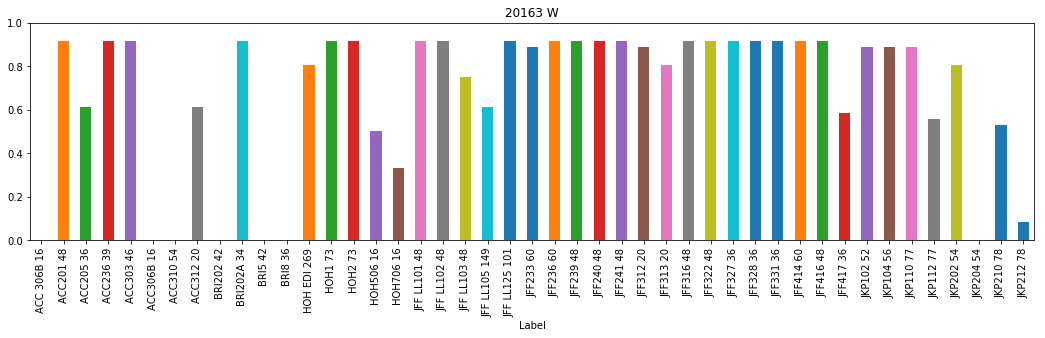

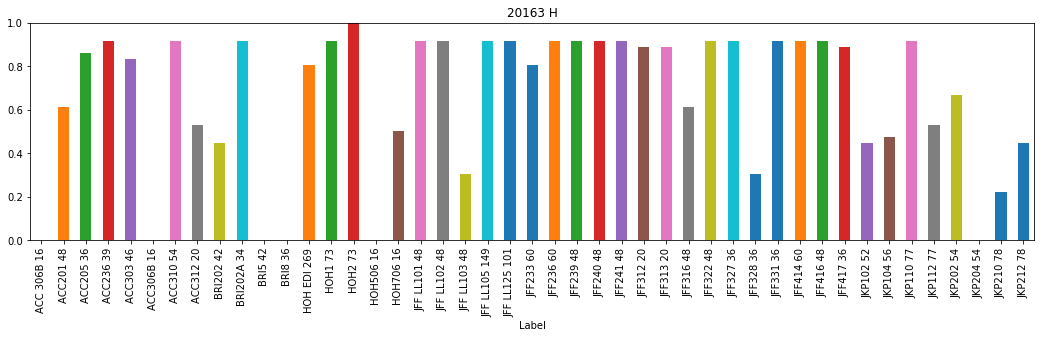

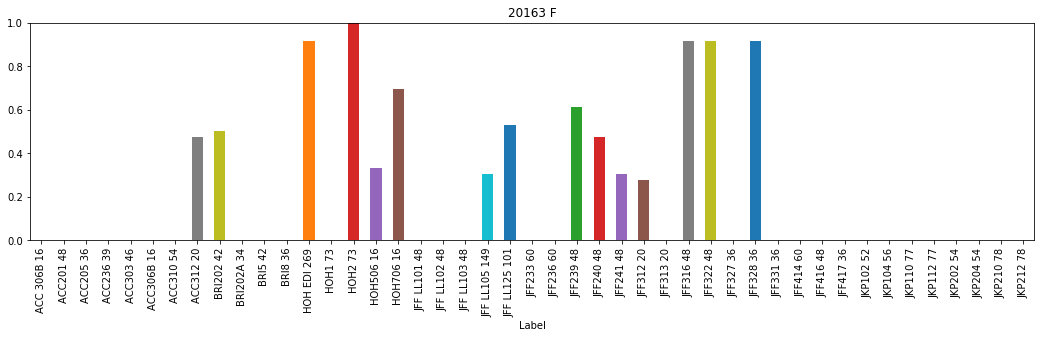

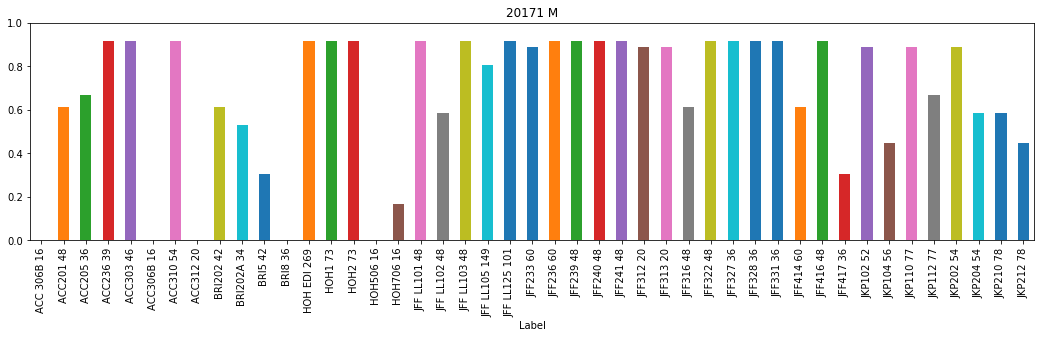

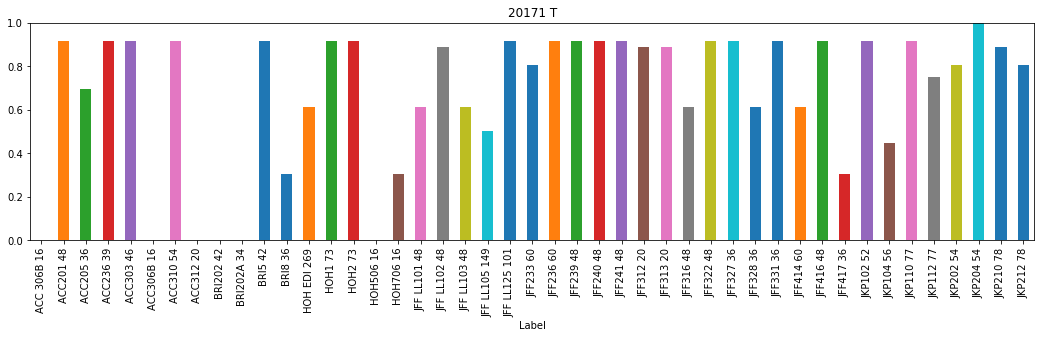

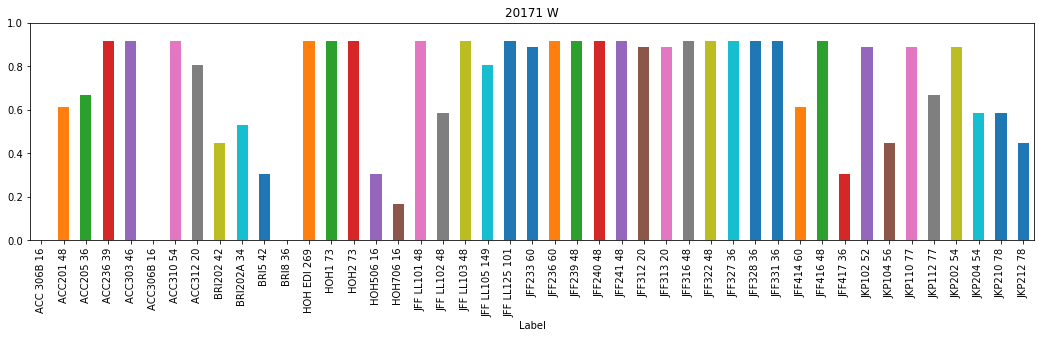

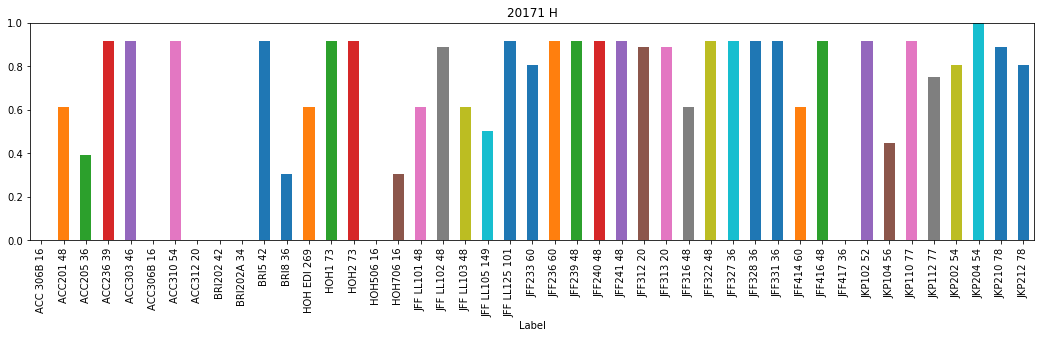

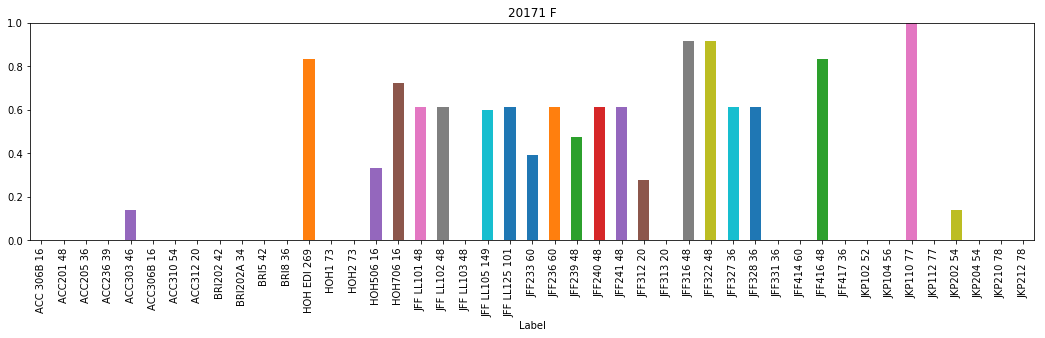

In [36]:
output=pd.DataFrame(lines,columns=['Term','Room','Day','Utilization']).merge(capacities[['Room','Size']], on='Room')  # Merge room size data with the generated output above
output['Label']=output.Room.str.cat(output.Size.astype(str),sep=' ') # Create labels of room number + room capacity

for term in [20163,20171]:
    for day in 'MTWHF':
        (output.query("Term==@term & Day==@day")
         .sort_values(['Room'])
         .plot(x='Label',y='Utilization',by='Day',kind='bar',title='{0} {1}'.format(term,day),figsize=(18,4),ylim=(0,1),legend=False)
        )
plt.show()

## Sorting by Prime Time Utilization of Rooms 
Here is the alternative plots sorted not by room but by utilization.

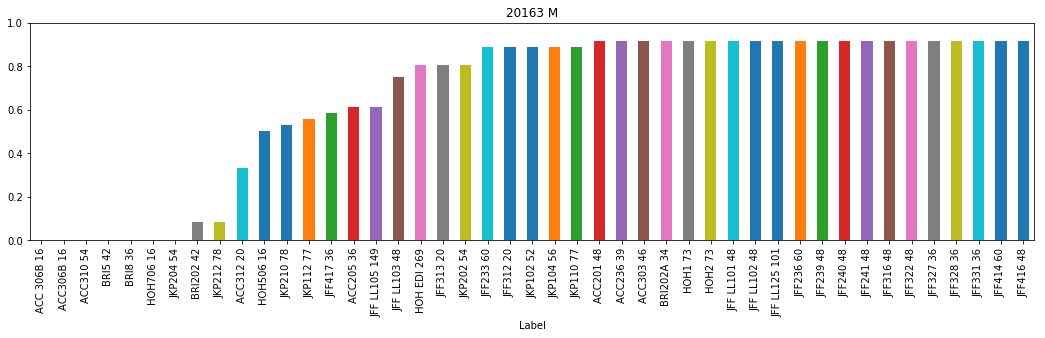

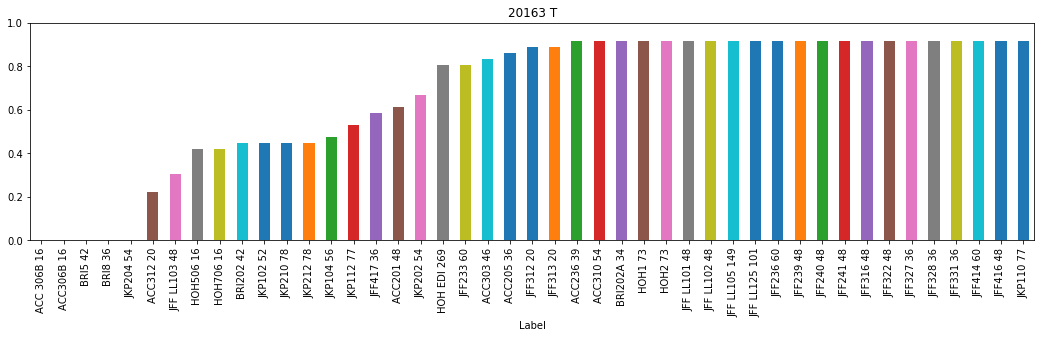

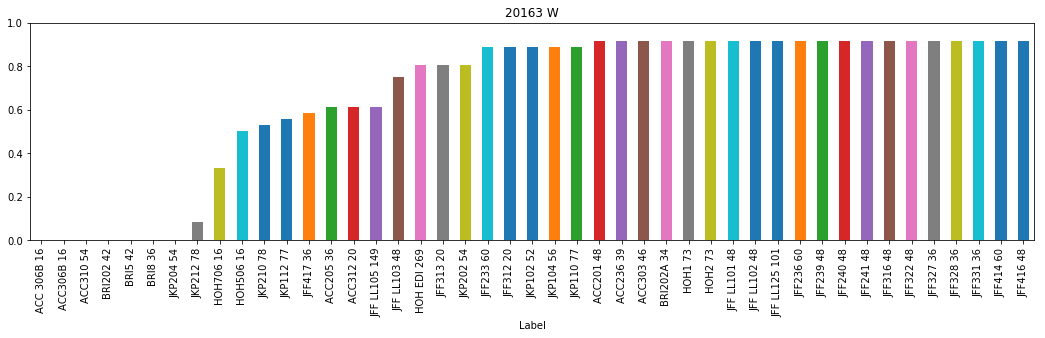

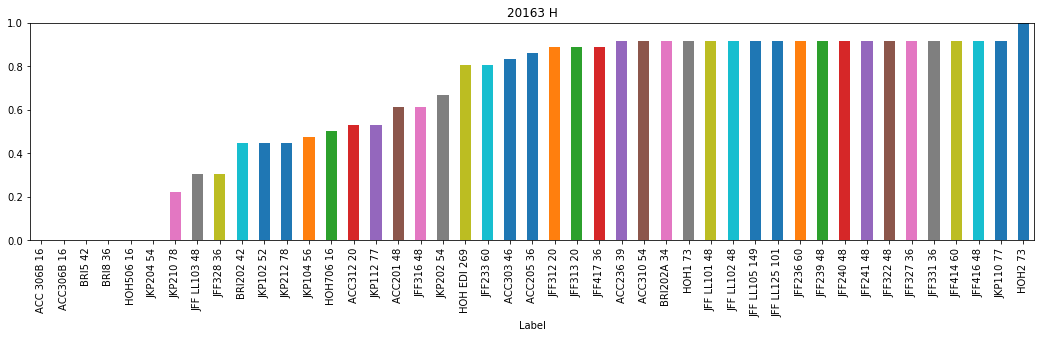

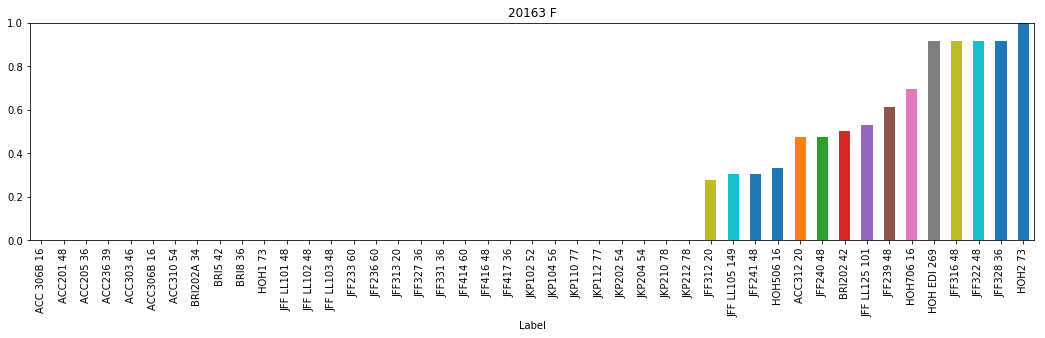

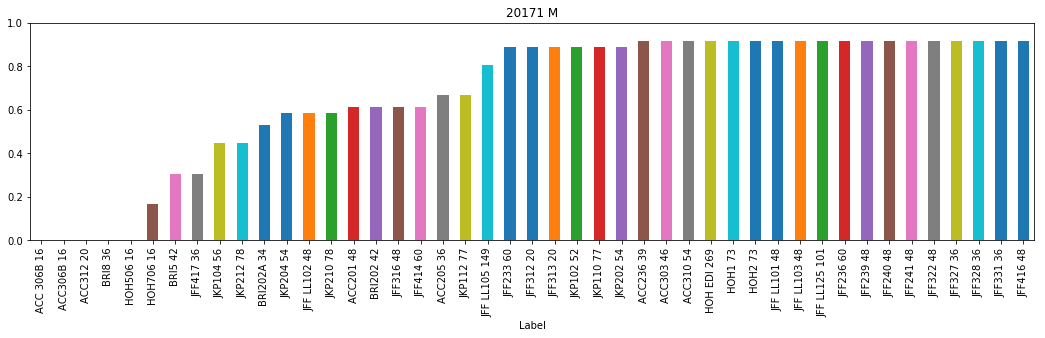

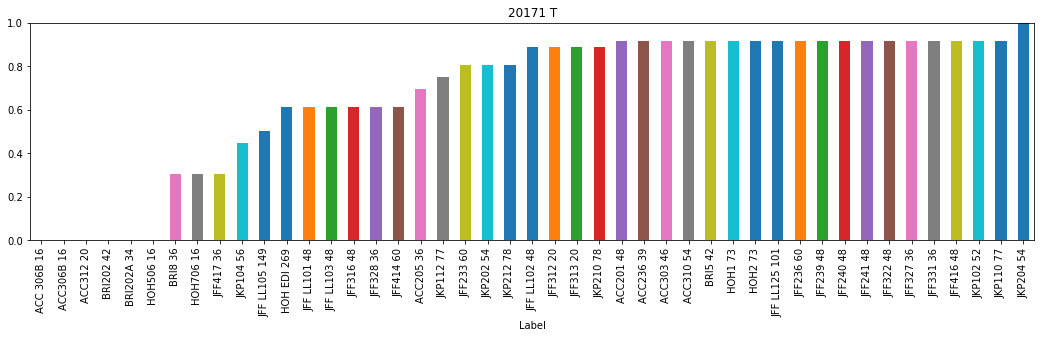

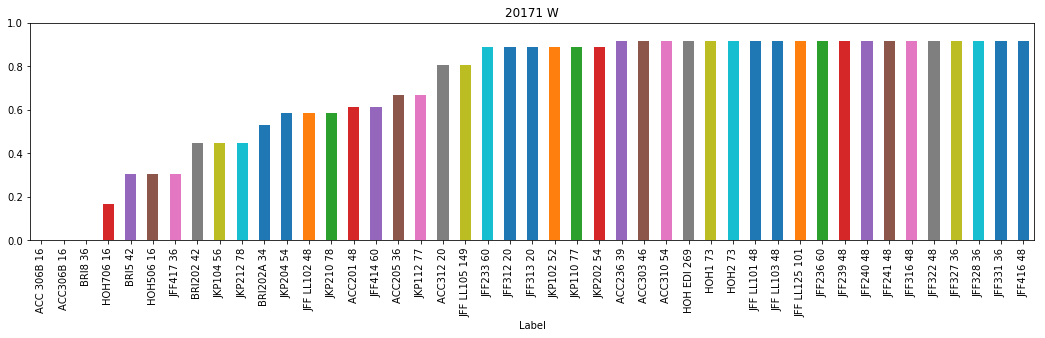

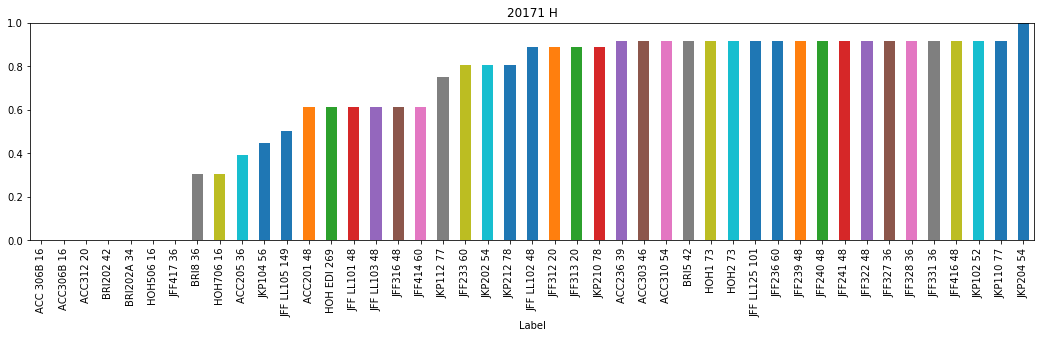

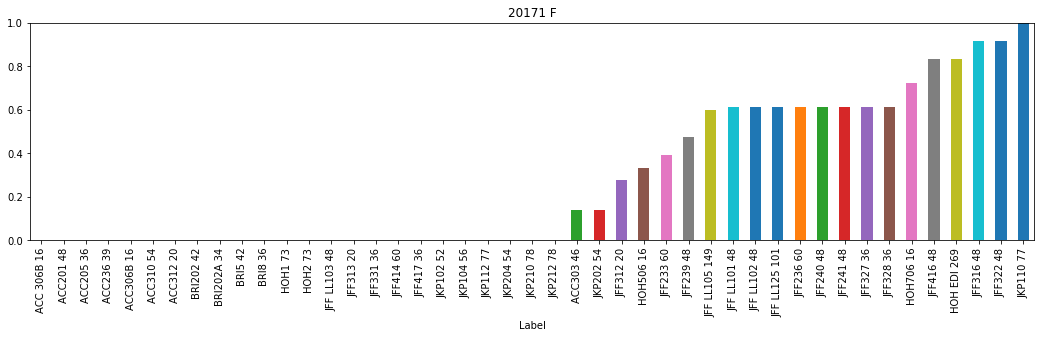

In [38]:
for term in [20163,20171]:
    for day in 'MTWHF':
        (output.query("Term==@term & Day==@day")
         .sort_values(['Utilization','Room'])
         .plot(x='Label',y='Utilization',by='Day',kind='bar',title='{0} {1}'.format(term,day),figsize=(18,4),ylim=(0,1),legend=False)
        )
plt.show()

# Visualizing the Raw Schedules

The following code visualizes the raw schedules (stored in the variable `dataDict`) from the code "Putting it All together." It uses the matplotlib method `vlines` which we used before to plot PMFs. 

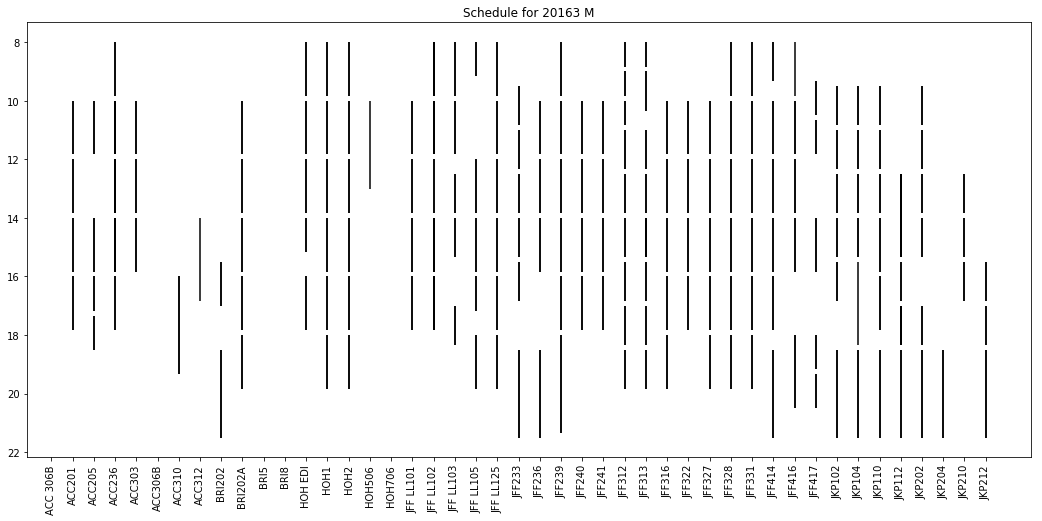

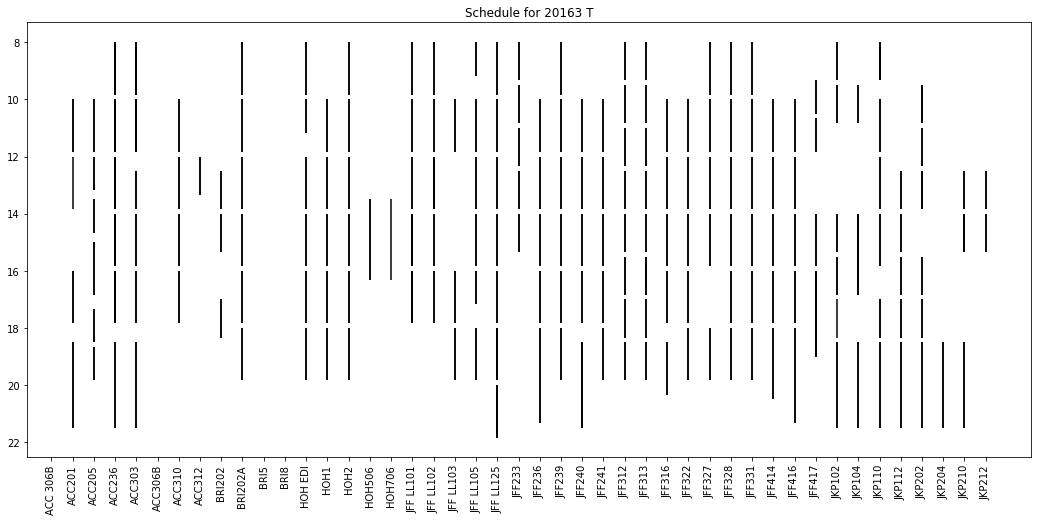

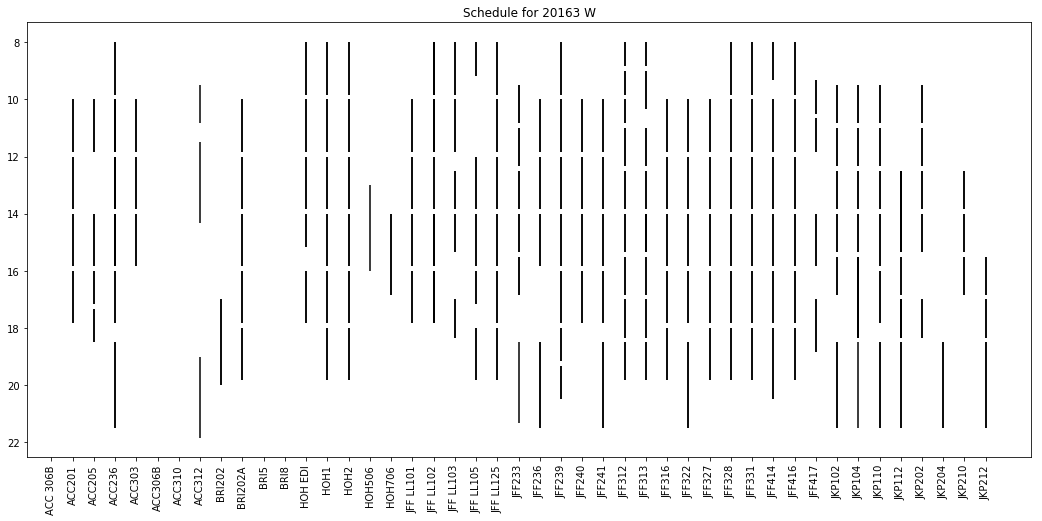

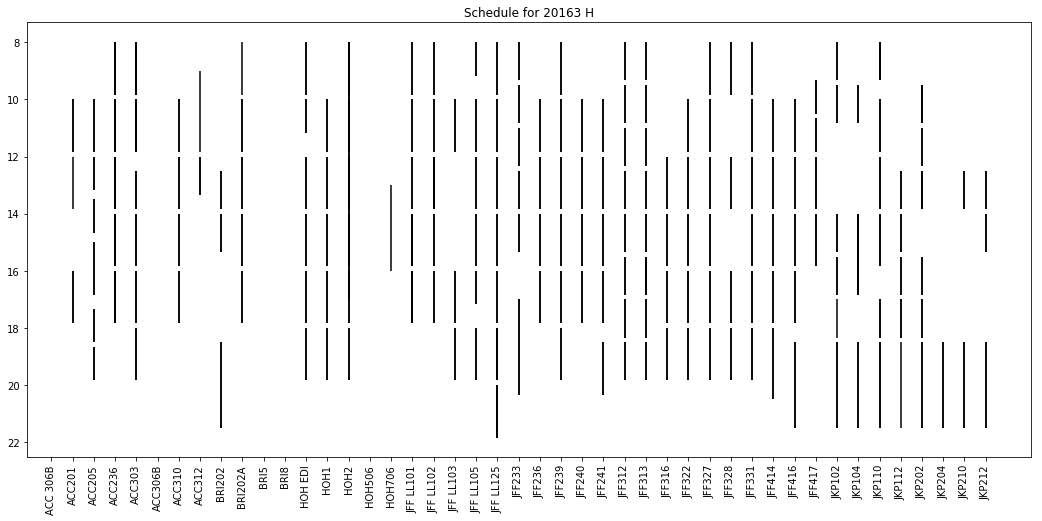

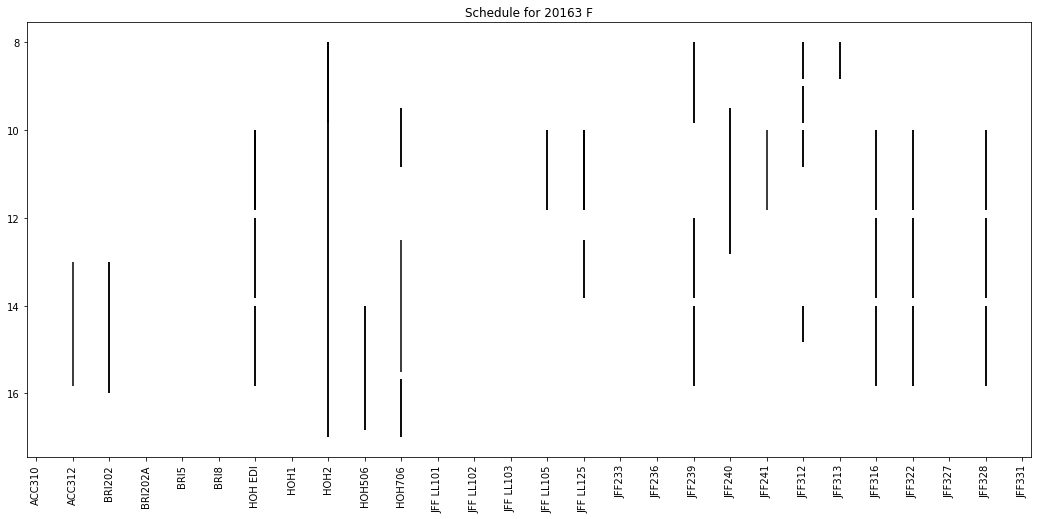

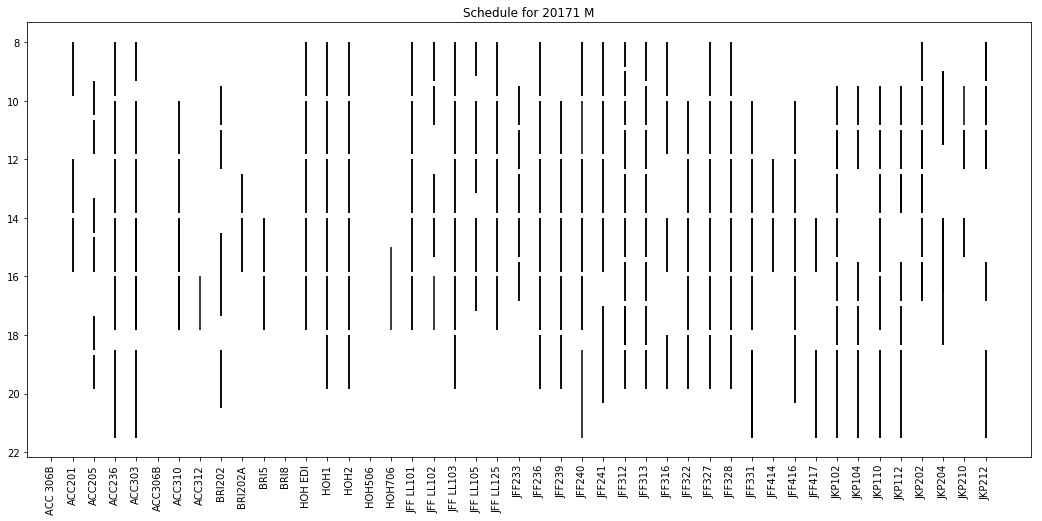

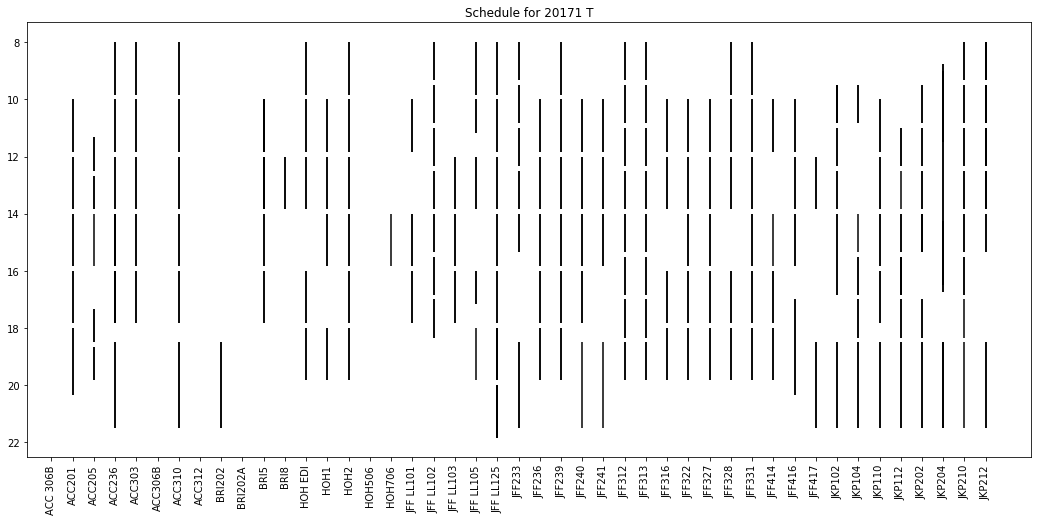

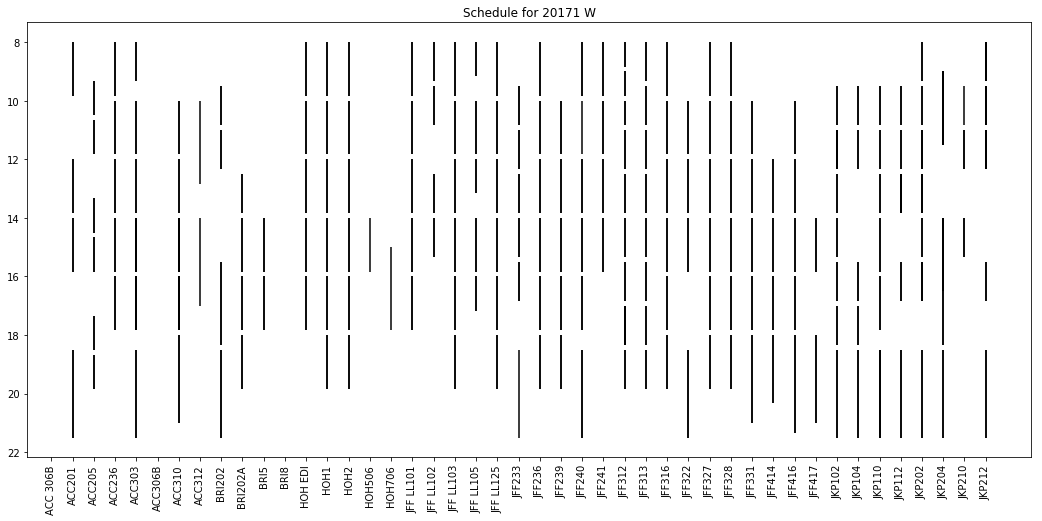

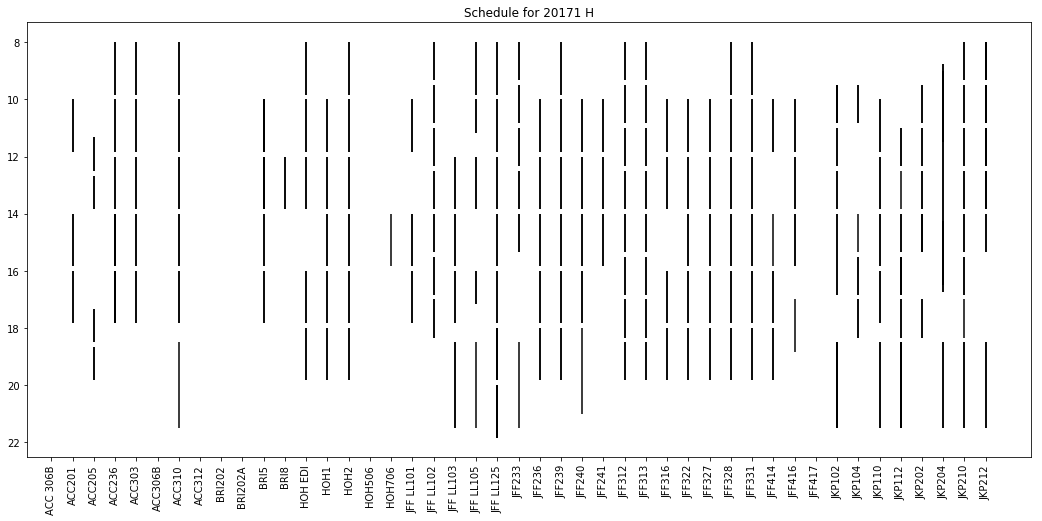

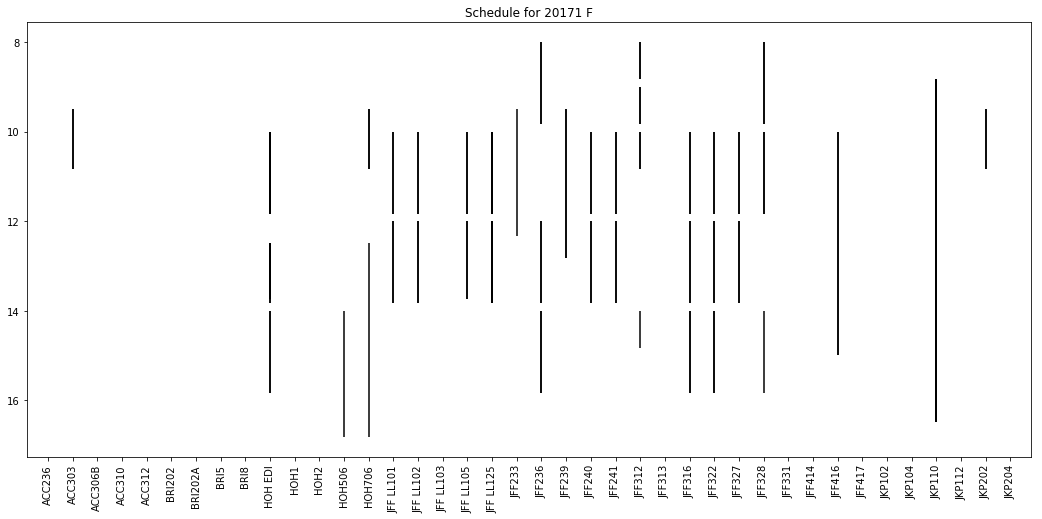

In [40]:

# Create a mapping between rooms as well as indices in the sorted order
rooms=sorted(list(capacities.Room))
roomsMap={rooms[ind]:ind for ind in range(len(rooms))}

# Iterate through the dataDict dictionary and store the data instead in dictionaries indexed by (term,day)
# For each course, the x dictionary stores the index of the room, ymin the begin time, ymax the end time.
x={}
ymin={}
ymax={}
for term,room,day in dataDict:
    for beg,end in dataDict[term,room,day]:
        if (term,day) not in x:
            x[term,day]=[]
            ymin[term,day]=[]
            ymax[term,day]=[]
        x[term,day].append(roomsMap[room])
        ymin[term,day].append(beg)
        ymax[term,day].append(end)

# Display the above data using matplotlib.vlines.
for term in [20163,20171]:
    for day in 'MTWHF':
        if (term,day) in x:
            plt.figure(figsize=(18,8))
            plt.xticks(range(len(rooms)),rooms,rotation=90)
            plt.title('Schedule for {0} {1}'.format(term,day))
            plt.gca().invert_yaxis()
            plt.vlines(x[term,day],ymin[term,day],ymax[term,day])
plt.show()
#plt.close('all')